<a href="https://colab.research.google.com/github/Nader-Khalil/DQN_DDQN_implementation/blob/yassmina/01_Deep_Q_Learning_Implementation_From_Scratch_with_several_trialsV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Team Members : 
- **Yassmina Abdo Ali**    >>  yassmenaabdo6@gmail.com  >>> GitHub Acc. :[Yassmina Abdo || Github ](https://github.com/yassmina-abdo)
- **Maryam Mostafa Alsawaf**  >> maryam1998.mostafa@gmail.com >>> GitHub Acc. [Maryam Mostafa](https://github.com/Maryam-Mostafa)
- **Nader Mohamed Khalil**  >> nader.mohamed.khalil@gmail.com  >>>GitHub Acc. [Maryam Mostafa](https://github.com/Nader-Khalil)


**Mount Drive**

---



In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


**Installing Dependencies**

In [ ]:
# install gym
!pip install gym --q

     |████████████████████████████████| 1.0 MB 5.3 MB/s 


In [ ]:
# install dependencies needed for recording videos
!apt install -y xvfb x11-utils --q
!sudo apt-get update  --q
!apt install python-opengl --q
!apt install ffmpeg --q
!pip install pyvirtualdisplay --q

!pip install --upgrade pip setuptools wheel --q
!pip install opencv-python --q
 
!pip install pyglet --q
!pip install ale-py==0.7.4 # To overcome an issue with gym (https://github.com/DLR-RM/stable-baselines3/issues/875) --q
!pip install pickle5 --q

#!pip install gym pyvirtualdisplay > /dev/null 2>&1 -
#!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install colabgymrender==1.0.2 --q

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 994 kB of archives.
After this operation, 2,982 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.11 [785 kB]
Fetched 994 kB in 0s (2,592 kB/s)
Selecting previously unselected package libxxf86dga1:amd64.
(Reading database ... 155673 fil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.8 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 6.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Download ROMs
!wget http://www.atarimania.com/roms/Roms.rar
!unrar x -Y "/content/Roms.rar"

Streaming output truncated to the last 5000 lines.
Extracting  ROMS/Air-Sea Battle (32 in 1) (1988) (Atari, Larry Kaplan) (CX26163P) (PAL).bin       1%  OK 
Extracting  ROMS/Air-Sea Battle (Hack) (Unknown) (4K).bin                  1%  OK 
Extracting  ROMS/Air-Sea Battle - Air Sea Battle (Anti-Aircraft) (1977) (Atari, Larry Kaplan) (CX2602, CX2602P) (PAL).bin       1%  OK 
Extracting  ROMS/Air-Sea Battle - Air Sea Battle - Target Fun (Anti-Aircraft) (1977) (Atari, Larry Kaplan - Sears) (CX2602 - 99802, 6-99802, 49-75102) ~.bin       1%  OK 
Extracting  ROMS/Airlock (1982) (Data Age) (DA1004) (Prototype).bin        1%  OK 
Extracting  ROMS/Airlock (1982) (Data Age) (DA1004) ~.bin                  1%  OK 
Extracting  ROMS/Airlock (1983) (Gameworld) (133-004) (PAL).bin            1%  OK 
Extracting  ROMS/Alices Abenteuer - Lilly Adventure (1983) (Quelle - Otto Versand) (732.273 8 - 600273, 781644) (PAL).bin       1%  

In [ ]:
!pip install gym[atari]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ale-py --q

     |████████████████████████████████| 1.6 MB 9.2 MB/s 


In [ ]:
from ale_py import ALEInterface

ale = ALEInterface()

In [ ]:
# import atari_py==0.2.6
# Import ROMs into gym using Arcade Learning Environment (ALE)
!ale-import-roms /content/ROMS/

[SUPPORTED]                       et /content/ROMS/E.T. - The Extra-Terrestrial (1982) (Atari, Jerome Domurat, Howard Scott Warshaw) (CX2674) ~.bin
[SUPPORTED]                   casino /content/ROMS/Casino - Poker Plus (Paddle) (1979) (Atari, Bob Whitehead - Sears) (CX2652 - 6-99816, 49-75151) ~.bin
[SUPPORTED]            haunted_house /content/ROMS/Haunted House (Mystery Mansion, Graves' Manor, Nightmare Manor) (1982) (Atari, James Andreasen - Sears) (CX2654 - 49-75141) ~.bin
[SUPPORTED]                  bowling /content/ROMS/Bowling (1979) (Atari, Larry Kaplan - Sears) (CX2628 - 6-99842, 49-75117) ~.bin
[SUPPORTED]               time_pilot /content/ROMS/Time Pilot (1983) (Coleco - Woodside Design Associates, Harley H. Puthuff Jr.) (2663) ~.bin
[SUPPORTED]           journey_escape /content/ROMS/Journey Escape (1983) (Data Age, J. Ray Dettling) (112-006) ~.bin
[SUPPORTED]                 atlantis /content/ROMS/Atlantis (Lost City of Atlantis) (1982) (Imagic, Dennis Koble) (720103-1A, 7

In [ ]:
!ale-import-roms --q

/bin/bash: ale-import-roms: command not found


In [ ]:
# !pip install gym pyvirtualdisplay > /dev/null 2>&1
# !pip install colabgymrender==1.0.2 --q


**Importing Libraries**

In [ ]:
# LA libraries 
import numpy as np

# imports for the enviroment 
import gym
# from ale_py import ALEInterface
# ale = ALEInterface()

# for the Algorithms impl.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mean_squared_error
from keras.callbacks import TensorBoard



# for Visulaization and Video Capturing 
from matplotlib import pyplot as plt
from base64 import b64encode
from gym.wrappers.monitoring.video_recorder import VideoRecorder
# start an instance of the virtual display
from pyvirtualdisplay import Display
display = Display(visible=False, size=(1400, 900))
_ = display.start()

from IPython.display import clear_output
from time import sleep
# Virtual display
from pyvirtualdisplay import Display

# virtual_display = Display(visible=0, size=(1400, 900))
# virtual_display.start()

In [ ]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
# from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop


the next two function is for prepration only we define a preprocessing function for our input game screens. We crop the image size convert the image into greyscale 1D tensor



# Preprocessing for each screen before sending it to the model 

In [ ]:
# Helpful preprocessing taken from github.com/ageron/tiny-dqn
def process_frame(frame):

    mspacman_color = np.array([210, 164, 74]).mean()
    img = frame[1:176:2, ::2]    # Crop and downsize
    img = img.mean(axis=2)       # Convert to greyscale
    img[img==mspacman_color] = 0 # Improve contrast by making pacman white
    img = (img - 128) / 128 - 1  # Normalize from -1 to 1.
    
    return np.expand_dims(img.reshape(88, 80, 1), axis=0)

In [ ]:
# Averages images from the last few frame
def  blend_images (images, blend):
    avg_image = np.expand_dims(np.zeros((88, 80, 1), np.float64), axis=0)

    for image in images:
        avg_image += image
        
    if len(images) < blend:
        return avg_image / len(images)
    else:
        return avg_image / blend

# Visualizaing the enviroment 

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: obs_type "image" should be replaced with the image type, one of: rgb, grayscale
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


9
['NOOP', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT']


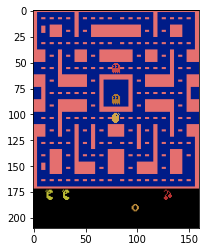

In [ ]:
env = gym.make("MsPacman-v0")
n_outputs = env.action_space.n
print(n_outputs)
print(env.env.get_action_meanings())

observation = env.reset()

import tensorflow as tf
import matplotlib.pyplot as plt


for i in range(22):
  
  if i > 20:
    plt.imshow(observation)
    plt.show()

  observation, _, _, _ = env.step(1)
  

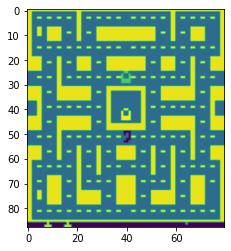

(210, 160, 3)
(88, 80)


In [ ]:
#Take a look at the preprocessed inputs in greyscale
#Let's compare the original and preprocessed tensors.

obs_preprocessed = process_frame(observation).reshape(88,80)
plt.imshow(obs_preprocessed)
plt.show()
print(observation.shape)
print(obs_preprocessed.shape)

In [ ]:
# Observation and action space 
obs_space = env.observation_space
action_space = env.action_space
print(f"The observation space: {obs_space}")
print(f"The action space: {action_space}")

The observation space: Box(0, 255, (210, 160, 3), uint8)
The action space: Discrete(9)


In [ ]:
type(action_space)

gym.spaces.discrete.Discrete

# **Implementation of the Algorithm**

**Introdction for the Deep Q Learning Algorithm :** 

Now, let's define our model. But first, let quickly recap what a DQN is.

DQN algorithm
-------------

Our environment is deterministic, so all equations presented here are
also formulated deterministically for the sake of simplicity. In the
reinforcement learning literature, they would also contain expectations
over stochastic transitions in the environment.

Our aim will be to train a policy that tries to maximize the discounted,
cumulative reward

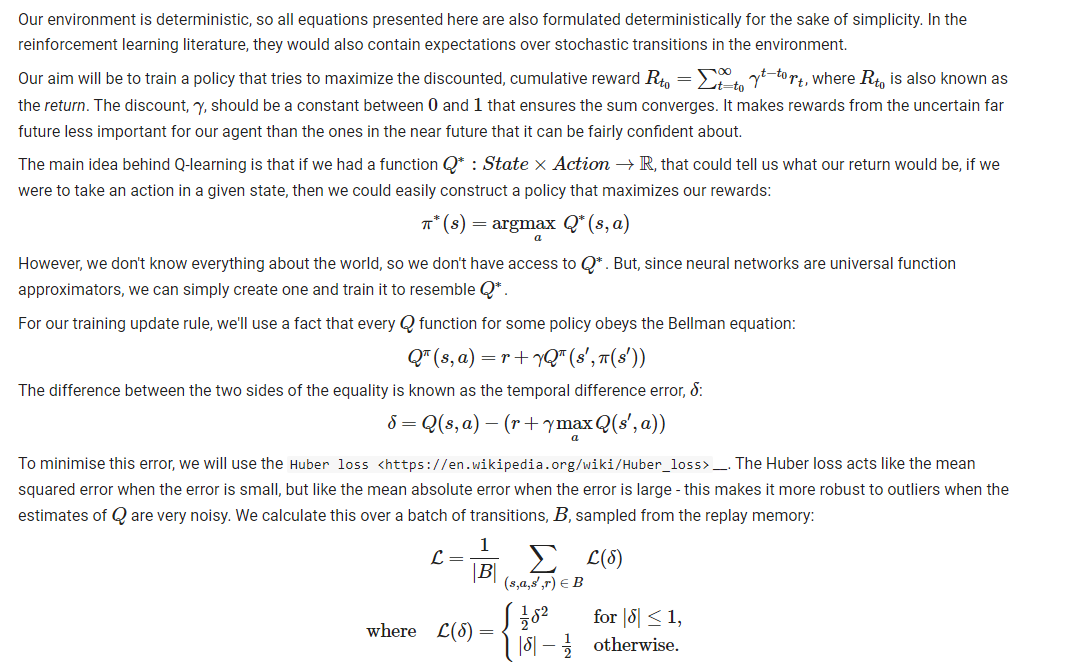


Okay, Now we define a class called DDQN_Agent for building our Double Deep Q network.  <br>
We build Q network with three convolutional layers with same padding followed by a flattening, and a three dense layers followed by  fully connected layer. 

In [ ]:
class DDQN_Agent:
    #
    # Initializes attributes and constructs CNN model and target_model
    #
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=100000)
        
        # Hyperparameters
        self.gamma = 0.99           # Discount rate
        self.epsilon = 1.0          # Exploration rate
        self.epsilon_min = 0.1      # Minimal exploration rate (epsilon-greedy)
        self.epsilon_decay = 0.995  # Decay rate for epsilon
        self.update_rate = 10000    # Number of steps until updating the target network
        
        # Construct DQN models
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.target_model.set_weights(self.model.get_weights())
        self.model.summary()

    #
    # Constructs CNN the archticture little small to make the run more realiable 
    #
    def _build_model(self):
        model = Sequential()
        
        # Conv Layers
        model.add(Conv2D(32, (8, 8), strides=4, padding='same', input_shape=self.state_size))
        model.add(Activation('relu'))
        
        model.add(Conv2D(64, (4, 4), strides=2, padding='same'))
        model.add(Activation('relu'))
        
        model.add(Conv2D(64, (3, 3), strides=1, padding='same'))
        model.add(Activation('relu'))
        model.add(Flatten())

        # FC Layers
        model.add(Dense(128, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        
        model.compile(loss='mse', optimizer=RMSprop(lr=0.00025, rho=0.95, epsilon=None, decay=0.0)
)
        return model

    #
    # Stores experience in replay memory
    #
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    #
    # Chooses action based on epsilon-greedy policy
    #
    def act(self, state):
        # Random exploration
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        
        act_values = self.model.predict(state)
        
        return np.argmax(act_values[0])  # Returns action using policy

    #
    # Trains the model using randomly selected experiences in the replay memory
    #
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        
        for state, action, reward, next_state, done in minibatch:
            
            if not done:
                max_action = np.argmax(self.model.predict(next_state)[0])
                target = (reward + self.gamma * self.target_model.predict(next_state)[0][max_action])
            else:
                target = reward
                
            # Construct the target vector as follows:
            # 1. Use the current model to output the Q-value predictions
            target_f = self.model.predict(state)
            
            # 2. Rewrite the chosen action value with the computed target
            target_f[0][action] = target
            
            # 3. Use vectors in the objective computation
            self.model.fit(state, target_f, epochs=1, verbose=0)
            
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    #
    # Sets the target model parameters to the current model parameters
    #
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())
            
    #
    # Loads a saved model
    #
    def load(self, name):
        self.model.load_weights(name)

    #
    # Saves parameters of a trained model
    #
    def save(self, name):
        self.model.save_weights(name)

# the Algo. stpes

for the steps of the algorithm as seq. :

1. First, we preprocess and feed the game screen (state s) to our DQN, which will
return the Q values of all possible actions in the state.
2. Now we select an action using the epsilon-greedy policy: with the probability
epsilon, we select a random action a and with probability 1-epsilon, we select an
action that has a maximum Q value, such as .
3. After selecting the action a, we perform this action in a state s and move to a new
state s' and receive a reward. The next state, s', is the preprocessed image of the
next game screen.
4. We store this transition in our replay buffer as <s,a,r,s'>.
5. Next, we sample some random batches of transitions from the replay buffer and
calculate the loss.

6. We know that the loss is defined as the squared
difference between target Q and predicted Q.

7. We perform gradient descent with respect to our actual network parameters in
order to minimize this loss.

8. Copy weights of training network to actual network
9. Repeat for M steps


**preparing the enviroment and call the obj from the class** 🤩


In [ ]:
env = gym.make('MsPacman-v0')
state_size = (88, 80, 1)
action_size = env.action_space.n
agent = DDQN_Agent(state_size, action_size)
#agent.load('models/')

episodes = 15
batch_size = 2
skip_start = 90  # MsPacman-v0 waits for 90 actions before the episode begins
total_time = 0   # Counter for total number of steps taken
all_rewards = 0  # Used to compute avg reward over time
blend = 4        # Number of images to blend
done = False

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: obs_type "image" should be replaced with the image type, one of: rgb, grayscale
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 22, 20, 32)        2080      
                                                                 
 activation_12 (Activation)  (None, 22, 20, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 10, 64)        32832     
                                                                 
 activation_13 (Activation)  (None, 11, 10, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 10, 64)        36928     
                                                                 
 activation_14 (Activation)  (None, 11, 10, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 7040)             

# **Train the agent**

In [ ]:
for e in range(episodes):
    total_reward = 0
    game_score = 0
    state = process_frame(env.reset())
    images = deque(maxlen=blend)  # Array of images to be blended
    images.append(state)
    
    for skip in range(skip_start): # skip the start of each game
        env.step(0)
    
    for time in range(5000):
        env.render(mode='rgb_array')
        total_time += 1
        
        # Every update_rate timesteps we update the target network parameters
        if total_time % agent.update_rate == 0:
            agent.update_target_model()
        
        # Return the avg of the last 4 frames
        state = blend_images(images, blend)
        
        # Transition Dynamics
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        
        game_score += reward
        total_reward += reward
        
        # Return the avg of the last 4 frames
        next_state = process_frame(next_state)
        images.append(next_state)
        next_state = blend_images(images, blend)
        
        # Store sequence in replay memory
        agent.remember(state, action, reward, next_state, done)
        
        state = next_state
        
        if done:
            all_rewards += game_score
            
            print("episode: {}/{}, game score: {}, reward: {}, avg reward: {}, time: {}, total time: {}"
                  .format(e+1, episodes, game_score, total_reward, all_rewards/(e+1), time, total_time))
            
            break
            
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

episode: 1/15, game score: 280.0, reward: 280.0, avg reward: 280.0, time: 427, total time: 428
episode: 2/15, game score: 270.0, reward: 270.0, avg reward: 275.0, time: 473, total time: 902
episode: 3/15, game score: 610.0, reward: 610.0, avg reward: 386.6666666666667, time: 617, total time: 1520
episode: 4/15, game score: 290.0, reward: 290.0, avg reward: 362.5, time: 485, total time: 2006
episode: 5/15, game score: 320.0, reward: 320.0, avg reward: 354.0, time: 439, total time: 2446
episode: 6/15, game score: 520.0, reward: 520.0, avg reward: 381.6666666666667, time: 565, total time: 3012
episode: 7/15, game score: 350.0, reward: 350.0, avg reward: 377.14285714285717, time: 495, total time: 3508
episode: 8/15, game score: 520.0, reward: 520.0, avg reward: 395.0, time: 447, total time: 3956
episode: 9/15, game score: 220.0, reward: 220.0, avg reward: 375.55555555555554, time: 395, total time: 4352
episode: 10/15, game score: 470.0, reward: 470.0, avg reward: 385.0, time: 577, total ti

**unfortunalty 😥, we couldn't increase the episodes more than that to see the result and attemping to tune some of the hyperparamter🌚** 

# Saving the model

In [ ]:
agent.save('/content/drive/MyDrive/Deep Q Learning Implementation - RL Project/savedModels/ddqn_pacman_7k-memory_50-steps')

# **Video Recording and Viewing results**

## Evaluation

Finally, let's visualize our agent's performance, and play a game within the gym environment itself.

In [ ]:
from base64 import b64encode
def render_mp4(videopath: str) -> str:
  """
  Gets a string containing a b4-encoded version of the MP4 video
  at the specified path.
  """
  mp4 = open(videopath, 'rb').read()
  base64_encoded_mp4 = b64encode(mp4).decode()
  return f'<video width=400 controls><source src="data:video/mp4;' \
         f'base64,{base64_encoded_mp4}" type="video/mp4"></video>'

In [ ]:
from gym.wrappers.monitoring.video_recorder import VideoRecorder

a_train = "/content/drive/MyDrive/Deep Q Learning Implementation - RL Project/Result_Video/result_video"
new_env = gym.make('MsPacman-v0')
new_obs = new_env.reset()
video = VideoRecorder(new_env, a_train)

# returns an initial observation

while True:
  new_env.render(mode='rgb_array')
  video.capture_frame()

  state = process_frame(new_obs)
  action = agent.act(state)
  obs, reward, done, _ = new_env.step(action)

  if done:
    break

video.close()
new_env.close()

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: obs_type "image" should be replaced with the image type, one of: rgb, grayscale
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
from IPython.display import HTML
html = render_mp4(a_train)
HTML(html)

# Trial 2 >> DQN Implementation

In [ ]:
class DQN_Agent:
    #
    # Initializes attributes and constructs CNN model and target_model
    #
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=5000)
        
        # Hyperparameters
        self.gamma = 1.0            # Discount rate
        self.epsilon = 1.0          # Exploration rate
        self.epsilon_min = 0.1      # Minimal exploration rate (epsilon-greedy)
        self.epsilon_decay = 0.995  # Decay rate for epsilon
        self.update_rate = 1000     # Number of steps until updating the target network
        
        # Construct DQN models
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.target_model.set_weights(self.model.get_weights())
        self.model.summary()

    #
    # Constructs CNN
    #
    def _build_model(self):
        model = Sequential()
        
        # Conv Layers
        model.add(Conv2D(32, (8, 8), strides=4, padding='same', input_shape=self.state_size))
        model.add(Activation('relu'))
        
        model.add(Conv2D(64, (4, 4), strides=2, padding='same'))
        model.add(Activation('relu'))
        
        model.add(Conv2D(64, (3, 3), strides=1, padding='same'))
        model.add(Activation('relu'))
        model.add(Flatten())

        # FC Layers
        # model.add(Dense(1024, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        
        model.compile(loss='mse', optimizer=RMSprop())
        return model

    #
    # Stores experience in replay memory
    #
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    #
    # Chooses action based on epsilon-greedy policy
    #
    def act(self, state):
        # Random exploration
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        
        act_values = self.model.predict(state)
        
        return np.argmax(act_values[0])  # Returns action using policy

    #
    # Trains the model using randomly selected experiences in the replay memory
    #
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        
        for state, action, reward, next_state, done in minibatch:
            
            if not done:
                target = (reward + self.gamma * np.amax(self.target_model.predict(next_state)))
            else:
                target = reward
                
            # Construct the target vector as follows:
            # 1. Use the current model to output the Q-value predictions
            target_f = self.model.predict(state)
            
            # 2. Rewrite the chosen action value with the computed target
            target_f[0][action] = target
            
            # 3. Use vectors in the objective computation
            self.model.fit(state, target_f, epochs=1, verbose=0)
            
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    #
    # Sets the target model parameters to the current model parameters
    #
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())
            
    #
    # Loads a saved model
    #
    def load(self, name):
        self.model.load_weights(name)

    #
    # Saves parameters of a trained model
    #
    def save(self, name):
        self.model.save_weights(name)

In [ ]:
env = gym.make('MsPacman-v0')
state_size = (88, 80, 1)
action_size = env.action_space.n
agent = DQN_Agent(state_size, action_size)

episodes = 10
batch_size = 4
skip_start = 90  # MsPacman-v0 waits for 90 actions before the episode begins
total_time = 0   # Counter for total number of steps taken
all_rewards = 0  # Used to compute avg reward over time
blend = 4        # Number of images to blend
done = False

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: obs_type "image" should be replaced with the image type, one of: rgb, grayscale
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 20, 32)        2080      
                                                                 
 activation (Activation)     (None, 22, 20, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 10, 64)        32832     
                                                                 
 activation_1 (Activation)   (None, 11, 10, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 10, 64)        36928     
                                                                 
 activation_2 (Activation)   (None, 11, 10, 64)        0         
                                                                 
 flatten (Flatten)           (None, 7040)              0

In [ ]:
episode_rewards = []
for e in range(episodes):
    total_reward = 0
    game_score = 0
    state = process_frame(env.reset())
    images = deque(maxlen=blend)  # Array of images to be blended
    images.append(state)
    
    for skip in range(skip_start): # skip the start of each game
        env.step(0)
    
    for time in range(7000):
        env.render(mode='rgb_array')
        total_time += 1
        
        # Every update_rate timesteps we update the target network parameters
        if total_time % agent.update_rate == 0:
            agent.update_target_model()
        
        # Return the avg of the last 4 frames
        state = blend_images(images, blend)
        
        # Transition Dynamics
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        
        # Return the avg of the last 4 frames
        next_state = process_frame(next_state)
        images.append(next_state)
        next_state = blend_images(images, blend)
        
        # Store sequence in replay memory
        agent.remember(state, action, reward, next_state, done)
        
        state = next_state
        game_score += reward
        reward -= 1  # Punish behavior which does not accumulate reward
        total_reward += reward
        
        if done:
            all_rewards += game_score
            episode_rewards.append(all_rewards)
            
            print("episode: {}/{}, game score: {}, reward: {}, avg reward: {}, std: {},time:{}, total time: {}"
                  .format(e+1, episodes, game_score, total_reward, np.mean(episode_rewards), np.std(episode_rewards), time, total_time))
            
            break
            
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

episode: 1/10, game score: 150.0, reward: -294.0, avg reward: 150.0, std: 0.0,time:443, total time: 444
episode: 2/10, game score: 560.0, reward: 76.0, avg reward: 430.0, std: 280.0,time:483, total time: 928
episode: 3/10, game score: 430.0, reward: -128.0, avg reward: 666.6666666666666, std: 405.32565782206393,time:557, total time: 1486
episode: 4/10, game score: 350.0, reward: -136.0, avg reward: 872.5, std: 500.31864846315693,time:485, total time: 1972
episode: 5/10, game score: 680.0, reward: 50.0, avg reward: 1132.0, std: 685.2853420291434,time:629, total time: 2602
episode: 6/10, game score: 120.0, reward: -208.0, avg reward: 1325.0, std: 759.9945175240849,time:327, total time: 2930
episode: 7/10, game score: 770.0, reward: 190.0, avg reward: 1572.857142857143, std: 929.3425369692319,time:579, total time: 3510
episode: 8/10, game score: 260.0, reward: -124.0, avg reward: 1791.25, std: 1043.8323320821214,time:383, total time: 3894
episode: 9/10, game score: 250.0, reward: -92.0, a

# Trial 3 >> Taxi , DQN 

This is not a complete trial it was just out first attemp to implment the DQN Algorithm , we tried it on taxi as it is simple gym enviroment so that we can get the ideas of the algorithm more deeper  before we build the complete one at **Pacman** game at first we left it here if it can help 


In [ ]:
import numpy as np
import random
from IPython.display import clear_output
from collections import deque
import progressbar
import gym
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape
from tensorflow.keras.optimizers import Adam 
import gym_bci



In [ ]:
env_taxi = gym.make("Taxi-v3").env
env_taxi.render() 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
print('Number of states: {}'.format(env_taxi.observation_space.n))
print('Number of actions: {}'.format(env_taxi.action_space.n)) 


Number of states: 500
Number of actions: 6


In [ ]:
class taxi:
     def __init__(self, env_taxi, optimizer):
         # Initialize attributes
         self._state_size = env_taxi.observation_space.n
         self._action_size = env_taxi.action_space.n
         self._optimizer = optimizer
         self.expirience_replay_memory = deque(maxlen=2000)
         # Initialize discount and exploration rate
         self.discount = 0.6
         self.exploration = 0.1
         # Build networks
         self.q_network = self._build_compile_model()
         self.target_network = self._build_compile_model()
         self.align_both_model()
     def gather(self, state, action, reward, next_state, terminated):
         self.expirience_replay_memory.append((state, action, reward, next_state, terminated))
     def _build_compile_model(self):
         model = Sequential()
         model.add(Embedding(self._state_size, 10, input_length=1))
         model.add(Reshape((10,)))
         model.add(Dense(50, activation='relu'))
         model.add(Dense(50, activation='relu'))
         model.add(Dense(self._action_size, activation='linear'))
         model.compile(loss='mse', optimizer=self._optimizer)
         return model
     def align_both_model(self):
         self.target_network.set_weights(self.q_network.get_weights())
     def active(self, state):
         if np.random.rand() <= self.exploration:
             return env_taxi.action_space.sample()
         q_values = self.q_network.predict(state)
         return np.argmax(q_values[0])
     def retraining(self, batch_size):
         minbatch = random.sample(self.expirience_replay_memory, batch_size)
         for state, action, reward, next_state, terminated in minbatch:
             target = self.q_network.predict(state)
             if terminated:
                 target[0][action] = reward
             else:
                 t = self.target_network.predict(next_state)
                 target[0][action] = reward + self.discount * np.amax(t)
             self.q_network.fit(state, target, epochs=1, verbose=0) 

In [ ]:
def _build_compile_model(self):
     model = Sequential()
     model.add(Embedding(self._state_size, 10, input_length=1))
     model.add(Reshape((10,)))
     model.add(Dense(50, activation='relu'))
     model.add(Dense(50, activation='relu'))
     model.add(Dense(self._action_size, activation='linear'))
     model.compile(loss='mse', optimizer=self._optimizer)
     return model 

In [ ]:
optimizer = Adam()
taxi = taxi(env_taxi, optimizer)
batch_size = 32
num_of_episodes = 1 # must increase this 
timesteps_per_episode = 100
taxi.q_network.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             5000      
                                                                 
 reshape (Reshape)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 6)                 306       
                                                                 
Total params: 8,406
Trainable params: 8,406
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for e in range(0, num_of_episodes):
     # Reset the environment
     state = env_taxi.reset()
     state = np.reshape(state, [1, 1])
     # Initialize variables
     reward = 0
     terminated = False
     bar = progressbar.ProgressBar(maxval=timesteps_per_episode/10, widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
     bar.start()
     for timestep in range(timesteps_per_episode):
         # Run Action
         action = taxi.active(state)
         # Take action    
         next_state, reward, terminated, info = env_taxi.step(action) 
         next_state = np.reshape(next_state, [1, 1])
         taxi.gather(state, action, reward, next_state, terminated)
         state = next_state
         if terminated:
             taxi.alighn_both_model()
             break
         if len(taxi.expirience_replay_memory) > batch_size:
             taxi.retraining(batch_size)
         if timestep%10 == 0:
             bar.update(timestep/10 + 1)
     bar.finish()
     if (e + 1) % 10 == 0:
         print("**********************************")
         print("Episode: {}".format(e + 1))
         env_taxi.render()
         print("**********************************")

[========================================================================] 100%


In [ ]:
def evaluate_agent():
  frames = [] # for animation
  env_taxi = gym.make("Taxi-v3").env
  # watch trained agent
  state = env_taxi.reset()
  done = False
  rewards = 0
  optimizer = Adam()
  # taxi = taxi(env_taxi, optimizer)


  for s in range(200):
    print(f"TRAINED AGENT")
    print("Step {}".format(s+1))
  
    action = taxi.active(state)
    new_state, reward, done, info = env_taxi.step(action)
    rewards += reward
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env_taxi.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )
    
    state = new_state
  
    if done == True:
      break
    
  env_taxi.close()

  return frames